# Investments Assignment 1
**Group 1:** *Micah Yo Maheo, Majda Mechti, Xiaohe Xu*

## Problem 1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

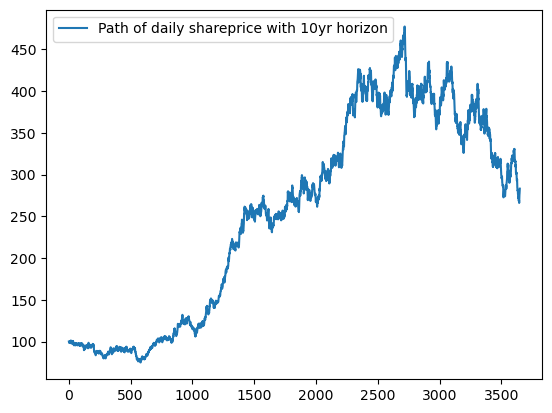

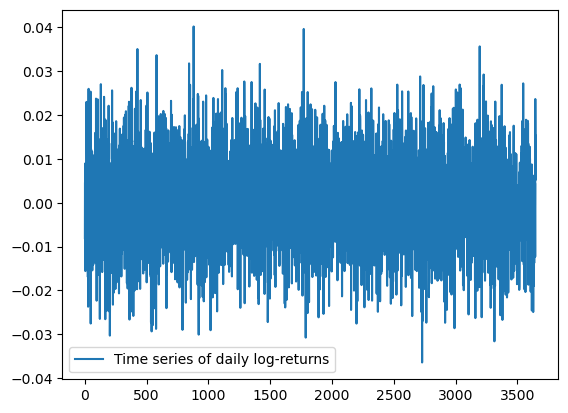

the annualized estimated log-return mean is 0.10405265370329522
the annualized estimated log-return std is 0.20107994891181166


In [2]:
mu = 0.06
sigma = 0.20
d = 3650
S0 = 100
dt = 1/365
#vector of 3650 random values 
dz = np.sqrt(dt)*np.random.randn(d)

#list of share prices
shareprice = []
S = S0;
shareprice.append(S)
for t in range(d) :
    S = S*np.exp((mu - 0.5*sigma**2)*dt + sigma*dz[t])
    shareprice.append(S)

#plot of share prices
plt.plot(shareprice, label='Path of daily shareprice with 10yr horizon')
plt.legend()
plt.show()

#list of compounded returns
logret = []
for t in range(d) :
    logret.append(np.log(shareprice[t+1]/shareprice[t]))

#plot of compounded returns
plt.plot(logret, label='Time series of daily log-returns')
plt.legend()
plt.show()

#computation of annualized mean and std of logret
print('the annualized estimated log-return mean is',np.mean(logret)/dt)
print('the annualized estimated log-return std is',np.std(logret)/np.sqrt(dt))


## Problem 2 

the sample has 25933 observations


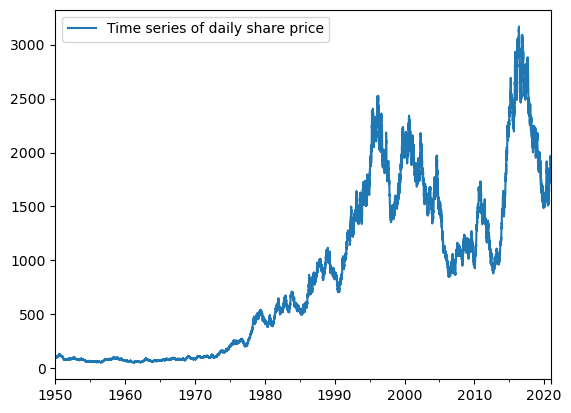

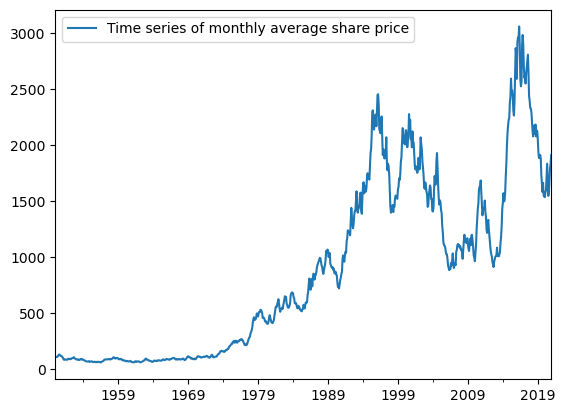

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

mu = 0.06
sigma = 0.20
S0 = 100
dt = 1/365
#vector of random values 
period_index = pd.period_range('1950-01-01','2020-12-31',freq='D')
d = len(period_index)
dz = np.sqrt(dt)*np.random.randn(d)

#list of share prices
shareprice = []
S = S0;
shareprice.append(S)
for t in range(d-1) :
    S = S*np.exp((mu - 0.5*sigma**2)*dt + sigma*dz[t])
    shareprice.append(S)

shareprice = pd.Series(shareprice,period_index)

#observations
nb_obs = len(shareprice)
print('the sample has',nb_obs,'observations')

#plot of the daily shareprice
shareprice.plot(label='Time series of daily share price')
plt.legend()
plt.show()

#plot of the monthly average shareprice
shareprice.resample('M').mean().plot(label='Time series of monthly average share price')
plt.legend()
plt.show()


## Problem 3

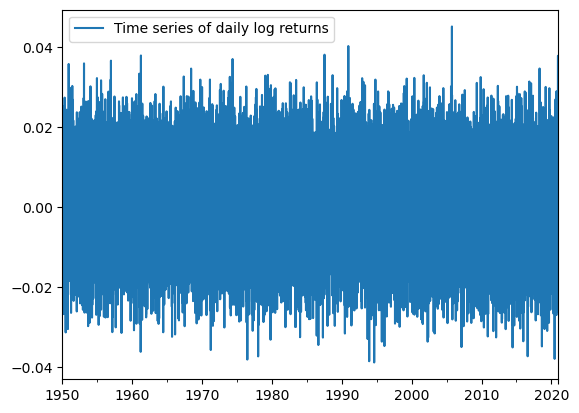

count    25932.000000
mean         0.000017
std          0.010534
min         -0.038896
25%         -0.007090
50%          0.000024
75%          0.007216
max          0.045064
dtype: float64


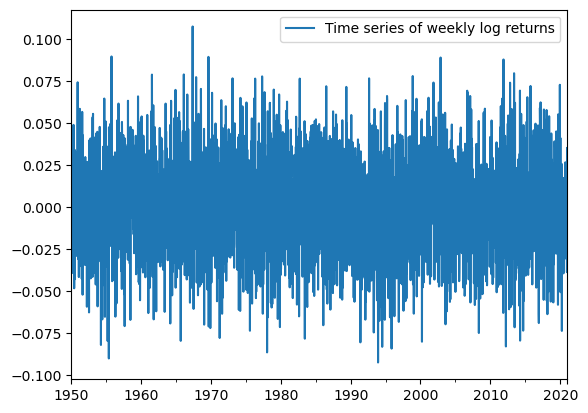

count    3705.000000
mean        0.000121
std         0.028084
min        -0.092725
25%        -0.019421
50%         0.000376
75%         0.019405
max         0.107275
dtype: float64


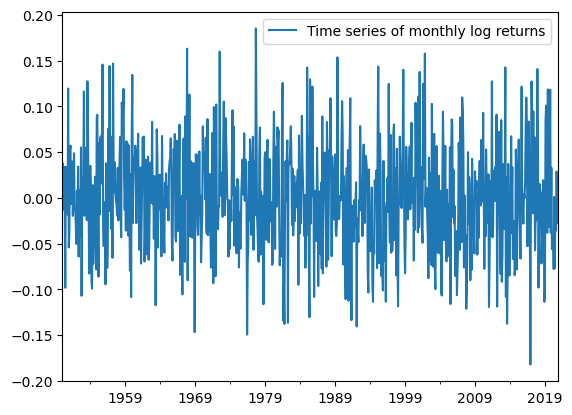

count    851.000000
mean       0.000474
std        0.058091
min       -0.182014
25%       -0.040412
50%       -0.000619
75%        0.038657
max        0.185070
dtype: float64


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#a,b

mu = 0.06
sigma = 0.20
S0 = 100
dt = 1/365
dt1 = 1/52
dt2 = 1/12
#vector of random values 
period_index = pd.period_range('1950-01-01','2020-12-31',freq='D')
d = len(period_index)
dz = np.sqrt(dt)*np.random.randn(d)

#list of share prices
shareprice = []
S = S0;
shareprice.append(S)
for t in range(d-1) :
    S = S*np.exp((mu - 0.5*sigma**2)*dt + sigma*dz[t])
    shareprice.append(S)

#time series of daily log returns
daily_shareprice = pd.Series(shareprice,period_index)
daily_log_shareprice = np.log(daily_shareprice/daily_shareprice.shift(1))

daily_log_shareprice.plot(label='Time series of daily log returns')
plt.legend()
plt.show()
print(daily_log_shareprice.describe())

#time series of weekly log returns 
weekly_shareprice = daily_shareprice.resample('W').last()
weekly_log_shareprice = np.log(weekly_shareprice/weekly_shareprice.shift(1))

weekly_log_shareprice.plot(label='Time series of weekly log returns')
plt.legend()
plt.show()
print(weekly_log_shareprice.describe())

#time series of monthly log returns
monthly_shareprice = daily_shareprice.resample('M').last()
monthly_log_shareprice = np.log(monthly_shareprice/monthly_shareprice.shift(1))

monthly_log_shareprice.plot(label='Time series of monthly log returns')
plt.legend()
plt.show()
print(monthly_log_shareprice.describe())


the annualized estimated daily log-return mean is 0.006332813211705995
the annualized estimated daily log-return std is 0.2012434188704368
the annualized estimated weekly log-return mean is 0.00631473250491539
the annualized estimated weekly log-return std is 0.20251892202945865
the annualized estimated monthly log-return mean is 0.005691650097377569
the annualized estimated monthly log-return std is 0.20123387439041748


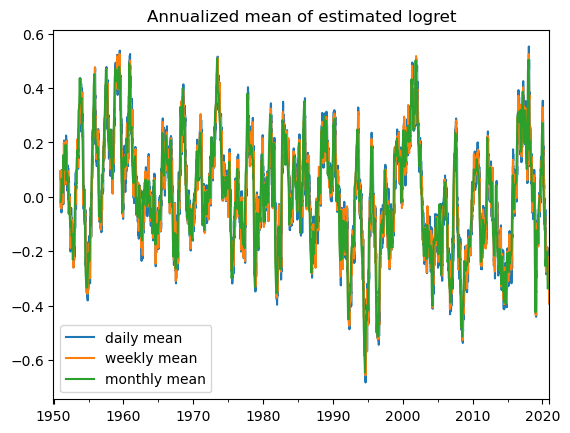

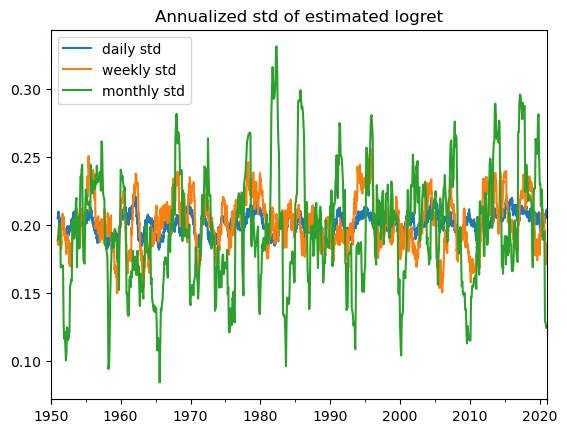

In [5]:
#c

#daily 
print('the annualized estimated daily log-return mean is',daily_log_shareprice.mean()/dt)
print('the annualized estimated daily log-return std is',daily_log_shareprice.std()/np.sqrt(dt))

#weekly
print('the annualized estimated weekly log-return mean is',weekly_log_shareprice.mean()/dt1)
print('the annualized estimated weekly log-return std is',weekly_log_shareprice.std()/np.sqrt(dt1))

#monthly
print('the annualized estimated monthly log-return mean is',monthly_log_shareprice.mean()/dt2)
print('the annualized estimated monthly log-return std is',monthly_log_shareprice.std()/np.sqrt(dt2))

#d  

#daily
ann_dls_mean = daily_log_shareprice.rolling(window = int(1/dt)).mean()/dt
ann_dls_std = daily_log_shareprice.rolling(window = int(1/dt)).std()*np.sqrt(1/dt)

#weekly
ann_wls_mean = weekly_log_shareprice.rolling(window = int(1/dt1)).mean()/dt1
ann_wls_std = weekly_log_shareprice.rolling(window = int(1/dt1)).std()*np.sqrt(1/dt1)

#monthly
ann_mls_mean = monthly_log_shareprice.rolling(window = int(1/dt2)).mean()/dt2
ann_mls_std = monthly_log_shareprice.rolling(window = int(1/dt2)).std()*np.sqrt(1/dt2)

ann_dls_mean.plot(label='daily mean')
ann_wls_mean.plot(label='weekly mean')
ann_mls_mean.plot(label='monthly mean')
plt.legend()
plt.title('Annualized mean of estimated logret')
plt.show()

ann_dls_std.plot(label='daily std')
ann_wls_std.plot(label='weekly std')
ann_mls_std.plot(label='monthly std')
plt.legend()
plt.title('Annualized std of estimated logret')
plt.show()


In [6]:

#f
daily_log_shareprice_mean = daily_log_shareprice.groupby([period_index.year]).mean()*365
daily_log_shareprice_std = daily_log_shareprice.groupby([period_index.year]).std()*np.sqrt(365)




print("Daily sample mean of the mean",daily_log_shareprice_mean.mean())
print("Daily sample std of the mean",daily_log_shareprice_mean.std())
print("Daily sample mean of the std",daily_log_shareprice_std.mean())
print(daily_log_shareprice_std.std())

period_index_1 = pd.period_range('1950-01-01','2020-12-31',freq='M')

monthly_log_shareprice_mean = monthly_log_shareprice.groupby([period_index_1.year]).mean()*12
monthly_log_shareprice_std = monthly_log_shareprice.groupby([period_index_1.year]).std()*np.sqrt(12)

print("Monthly sample mean of the mean",monthly_log_shareprice_mean.mean())
print(monthly_log_shareprice_mean.std())
print(monthly_log_shareprice_std.mean())
print(monthly_log_shareprice_std.std())


0.006338659401235565
0.2065113962480359
0.20109777497030326
0.007345054347604828
0.005711268847094697
0.20652722941243296
0.19645173050610104
0.041582513444402794


(e) If we consider firstly the historical variation in the time-serie of annualized mean, we can see that in the monthly frequency , the estimation of the mean is very noisy since it varies from -0.6 to 0.6 (approximately) whereas mu = 0.06. So we wouldn't be able to recover the true value of mu just by looking at the time series of annualized mean. 
This doesn't change across the different frequencies (daily or weekly), the estimation of mu is still very noisy and innacurate. In fact, the plots of the different frequencies are almost overlapping. 

If we consider secondly the historical variation in the time-serie of annualized standard deviation, we can see that in the monthly frequency, the estimation of the std sigma is a littly noisy since it varies between 0.1 and 0.3 (the true value of sigma is 0.02). However the etimation improves when we increase the frequency. Indeed, it only varies between 0.15 and 0.25 for the weekly sampling frequency and only between 0.18 and 0.22 which is much closer to 0.2 for the daily sampling frequency. 

(f) We get that the estimated mean is a little different than the theoretical mean (tiny difference between daily and monthly data). Comparing with the theoretical result mu, which is 0.06, there exists a little gap between these numbers. 
But the mean of standard deviation is 0.2(approximately), which is quite similar to the theoretical result sigma (0.2). 
And in addition, the sample standard deviation of the standard deviation is also close to zero. So we can see, the total result seems to be accurate. That means the great accurancy for us to use the yearly mean data.

## Problem 4

In [7]:
import pandas as pd
import numpy as np
import wrds
db=wrds.Connection(wrds_username='joe')
db.create_pgpass_file()

Enter your WRDS username [joe]: mechti
Enter your password: ········


WRDS recommends setting up a .pgpass file.


Create .pgpass file now [y/n]?:  y


Created .pgpass file successfully.
Loading library list...
Done


In [8]:
#only 252 days per year in real world data
dt=1/252

apple=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='2001-01-01' and date<='2020-12-31'")
apple['ret']=np.log(1+apple['ret'])
apple=apple.rename(index=apple['date'],columns={'ret':'logret'})
apple.index = pd.to_datetime(apple.index)

sachs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='2001-01-01' and date<='2020-12-31'")
sachs['ret']=np.log(1+sachs['ret'])
sachs=sachs.rename(index=sachs['date'],columns={'ret':'logret'})
sachs.index = pd.to_datetime(sachs.index)

micro=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='2001-01-01' and date<='2020-12-31'")
micro['ret']=np.log(1+micro['ret'])
micro=micro.rename(index=micro['date'],columns={'ret':'logret'})
micro.index = pd.to_datetime(micro.index)

proct=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='2001-01-01' and date<='2020-12-31'")
proct['ret']=np.log(1+proct['ret'])
proct=proct.rename(index=proct['date'],columns={'ret':'logret'})
proct.index = pd.to_datetime(proct.index)

gener=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='2001-01-01' and date<='2020-12-31'")
gener['ret']=np.log(1+gener['ret'])
gener=gener.rename(index=gener['date'],columns={'ret':'logret'})
gener.index = pd.to_datetime(gener.index)

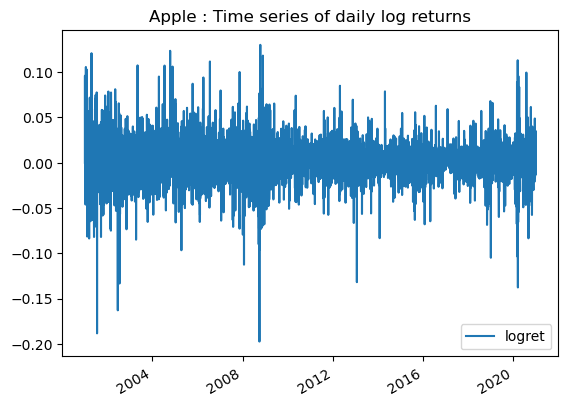

            logret
count  5032.000000
mean      0.001264
std       0.023160
min      -0.197470
25%      -0.009671
50%       0.000949
75%       0.012613
max       0.130194
the annualized daily mean is 0.3185833929222789
the annualized daily std is 0.36765135896528306


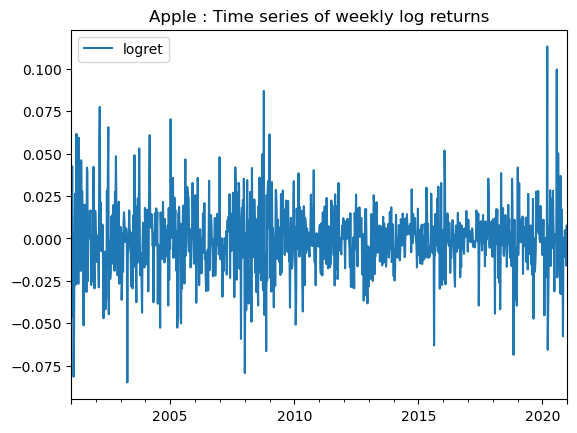

            logret
count  1044.000000
mean     -0.001023
std       0.020281
min      -0.084926
25%      -0.011130
50%      -0.000872
75%       0.009662
max       0.113157
the annualized weekly mean is -0.05321764950857133
the annualized weekly std is 0.14624488568639454


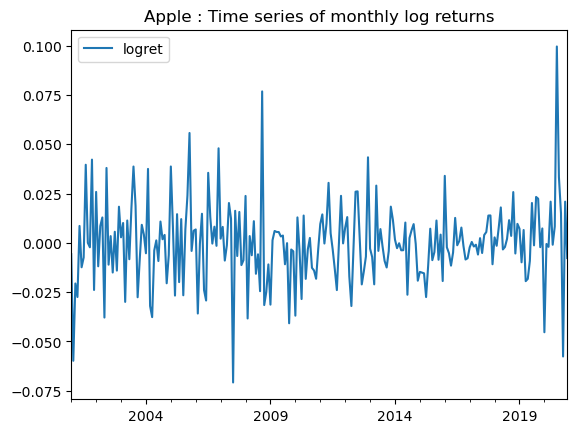

           logret
count  240.000000
mean    -0.000187
std      0.020301
min     -0.070823
25%     -0.010132
50%     -0.000781
75%      0.009556
max      0.099564
the annualized monthly mean is -0.0022469431736819997
the annualized monthly std is 0.07032397514966038


In [9]:
# time series of daily log returns
apple.plot(title='Apple : Time series of daily log returns')
plt.legend()
plt.show()
print(apple.describe())
print('the annualized daily mean is',apple['logret'].mean()/dt)
print('the annualized daily std is',apple['logret'].std()/np.sqrt(dt))

# time series of weekly log returns 
apple.resample('W').last().plot(title='Apple : Time series of weekly log returns')
plt.legend()
plt.show()
print(apple.resample('W').last().describe())
print('the annualized weekly mean is',apple['logret'].resample('W').last().mean()/dt1)
print('the annualized weekly std is',apple['logret'].resample('W').last().std()/np.sqrt(dt1))

# time series of monthly log returns
apple.resample('M').last().plot(title='Apple : Time series of monthly log returns')
plt.legend()
plt.show()
print(apple.resample('M').last().describe())
print('the annualized monthly mean is',apple['logret'].resample('M').last().mean()/dt2)
print('the annualized monthly std is',apple['logret'].resample('M').last().std()/np.sqrt(dt2))

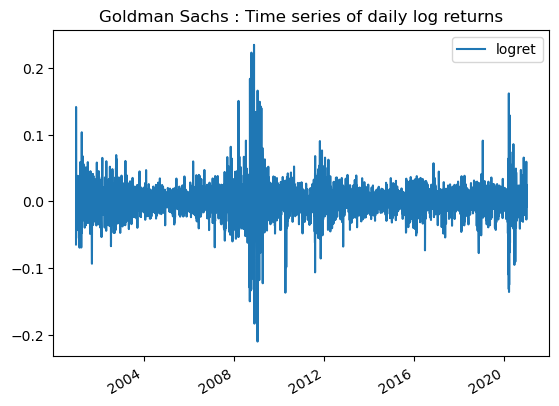

            logret
count  5032.000000
mean      0.000227
std       0.022636
min      -0.210223
25%      -0.009845
50%       0.000338
75%       0.010664
max       0.234818
the annualized daily mean is 0.05715645744723996
the annualized daily std is 0.35932834744391157


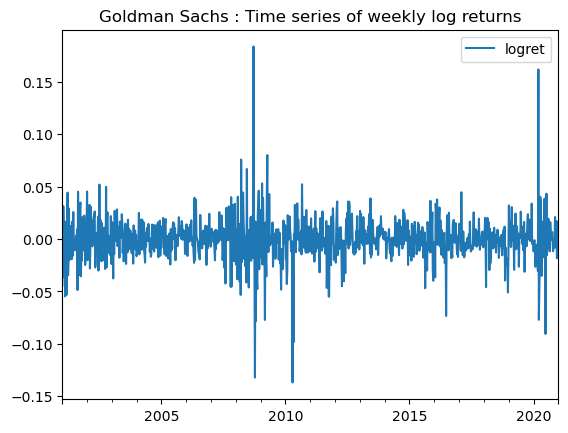

            logret
count  1044.000000
mean     -0.000261
std       0.020633
min      -0.136863
25%      -0.009708
50%      -0.000425
75%       0.009682
max       0.183864
the annualized weekly mean is -0.013595261436573901
the annualized weekly std is 0.14878422356806478


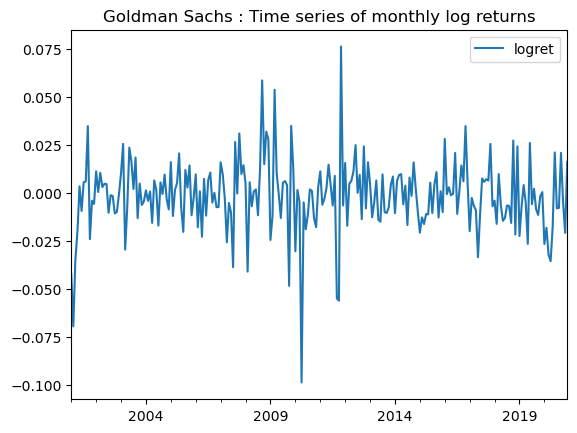

           logret
count  240.000000
mean    -0.001567
std      0.018725
min     -0.098561
25%     -0.010788
50%     -0.000510
75%      0.007501
max      0.076390
the annualized monthly mean is -0.018805473731904748
the annualized monthly std is 0.0648656612715224


In [10]:
# time series of daily log returns
sachs.plot(title='Goldman Sachs : Time series of daily log returns')
plt.legend()
plt.show()
print(sachs.describe())
print('the annualized daily mean is',sachs['logret'].mean()/dt)
print('the annualized daily std is',sachs['logret'].std()/np.sqrt(dt))

# time series of weekly log returns 
sachs.resample('W').last().plot(title='Goldman Sachs : Time series of weekly log returns')
plt.legend()
plt.show()
print(sachs.resample('W').last().describe())
print('the annualized weekly mean is',sachs['logret'].resample('W').last().mean()/dt1)
print('the annualized weekly std is',sachs['logret'].resample('W').last().std()/np.sqrt(dt1))

# time series of monthly log returns
sachs.resample('M').last().plot(title='Goldman Sachs : Time series of monthly log returns')
plt.legend()
plt.show()
print(sachs.resample('M').last().describe())
print('the annualized monthly mean is',sachs['logret'].resample('M').last().mean()/dt2)
print('the annualized monthly std is',sachs['logret'].resample('M').last().std()/np.sqrt(dt2))

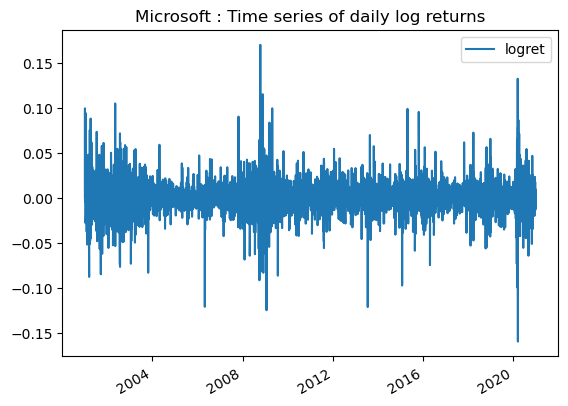

            logret
count  5032.000000
mean      0.000552
std       0.018260
min      -0.159453
25%      -0.007782
50%       0.000380
75%       0.008922
max       0.170626
the annualized daily mean is 0.13908336044794087
the annualized daily std is 0.2898648787797165


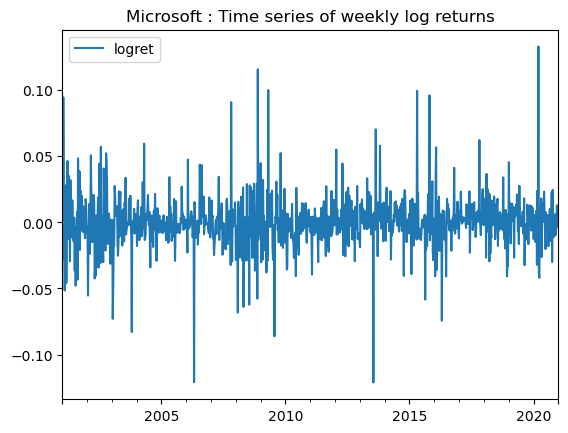

            logret
count  1044.000000
mean     -0.000114
std       0.020119
min      -0.121033
25%      -0.008632
50%      -0.000370
75%       0.008364
max       0.132929
the annualized weekly mean is -0.005924429358328512
the annualized weekly std is 0.14507904704712396


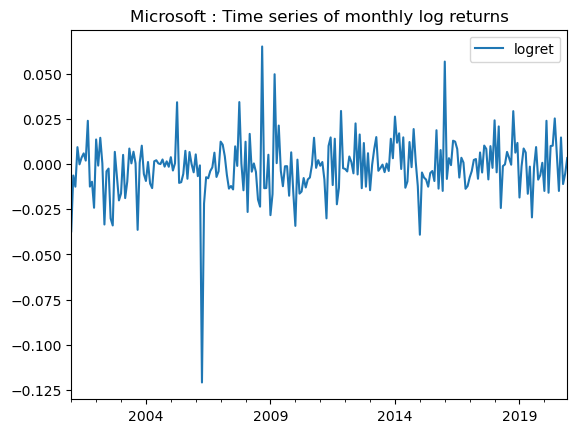

           logret
count  240.000000
mean    -0.001707
std      0.016405
min     -0.120769
25%     -0.009661
50%     -0.001333
75%      0.006383
max      0.065013
the annualized monthly mean is -0.020483638797145366
the annualized monthly std is 0.0568298536799045


In [11]:
# time series of daily log returns
micro.plot(title='Microsoft : Time series of daily log returns')
plt.legend()
plt.show()
print(micro.describe())
print('the annualized daily mean is',micro['logret'].mean()/dt)
print('the annualized daily std is',micro['logret'].std()/np.sqrt(dt))

# time series of weekly log returns 
micro.resample('W').last().plot(title='Microsoft : Time series of weekly log returns')
plt.legend()
plt.show()
print(micro.resample('W').last().describe())
print('the annualized weekly mean is',micro['logret'].resample('W').last().mean()/dt1)
print('the annualized weekly std is',micro['logret'].resample('W').last().std()/np.sqrt(dt1))

# time series of monthly log returns
micro.resample('M').last().plot(title='Microsoft : Time series of monthly log returns')
plt.legend()
plt.show()
print(micro.resample('M').last().describe())
print('the annualized monthly mean is',micro['logret'].resample('M').last().mean()/dt2)
print('the annualized monthly std is',micro['logret'].resample('M').last().std()/np.sqrt(dt2))

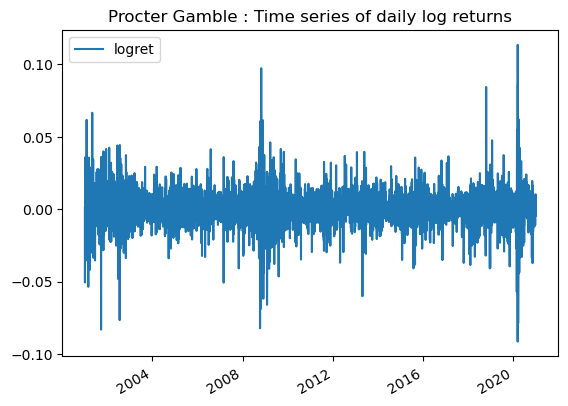

            logret
count  5032.000000
mean      0.000360
std       0.011855
min      -0.091428
25%      -0.005020
50%       0.000373
75%       0.005958
max       0.113409
the annualized daily mean is 0.0906078517411996
the annualized daily std is 0.18819699741150694


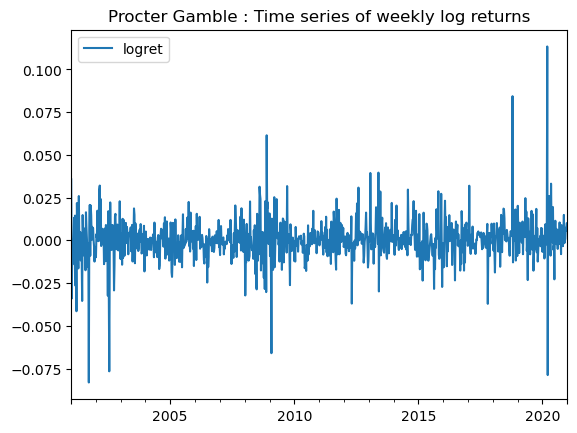

            logret
count  1044.000000
mean      0.000351
std       0.012061
min      -0.083161
25%      -0.004720
50%       0.000320
75%       0.005107
max       0.113409
the annualized weekly mean is 0.018233075852083617
the annualized weekly std is 0.08697631585838547


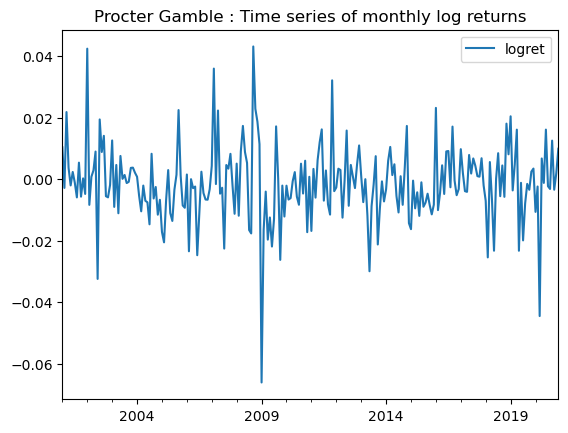

           logret
count  240.000000
mean    -0.001493
std      0.012403
min     -0.066028
25%     -0.007530
50%     -0.002023
75%      0.004607
max      0.043103
the annualized monthly mean is -0.01792000412022349
the annualized monthly std is 0.042964598039927804


In [12]:
# time series of daily log returns
proct.plot(title='Procter Gamble : Time series of daily log returns')
plt.legend()
plt.show()
print(proct.describe())
print('the annualized daily mean is',proct['logret'].mean()/dt)
print('the annualized daily std is',proct['logret'].std()/np.sqrt(dt))

# time series of weekly log returns 
proct.resample('W').last().plot(title='Procter Gamble : Time series of weekly log returns')
plt.legend()
plt.show()
print(proct.resample('W').last().describe())
print('the annualized weekly mean is',proct['logret'].resample('W').last().mean()/dt1)
print('the annualized weekly std is',proct['logret'].resample('W').last().std()/np.sqrt(dt1))

# time series of monthly log returns
proct.resample('M').last().plot(title='Procter Gamble : Time series of monthly log returns')
plt.legend()
plt.show()
print(proct.resample('M').last().describe())
print('the annualized monthly mean is',proct['logret'].resample('M').last().mean()/dt2)
print('the annualized monthly std is',proct['logret'].resample('M').last().std()/np.sqrt(dt2))

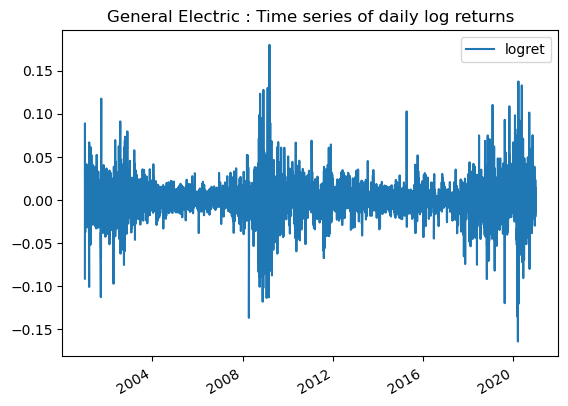

            logret
count  5032.000000
mean     -0.000174
std       0.021047
min      -0.164394
25%      -0.008503
50%       0.000000
75%       0.008369
max       0.179844
the annualized daily mean is -0.04390305712263904
the annualized daily std is 0.33410484600865253


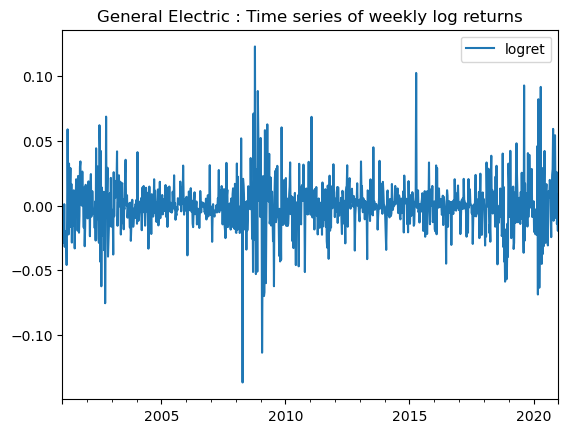

            logret
count  1044.000000
mean     -0.000487
std       0.020468
min      -0.136841
25%      -0.009296
50%      -0.000568
75%       0.008199
max       0.123088
the annualized weekly mean is -0.025326496087921656
the annualized weekly std is 0.14759684482733718


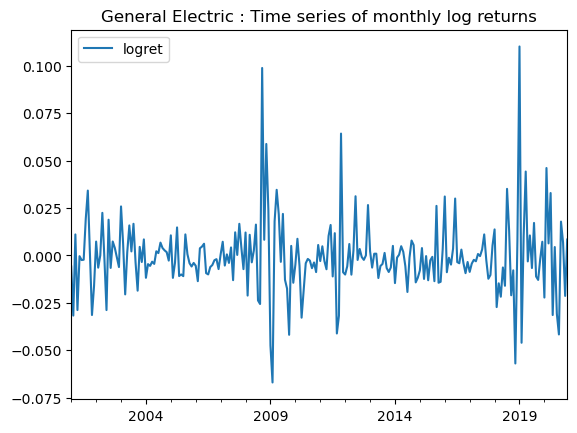

           logret
count  240.000000
mean    -0.000840
std      0.019299
min     -0.067032
25%     -0.008886
50%     -0.002433
75%      0.005611
max      0.110184
the annualized monthly mean is -0.01007850410617625
the annualized monthly std is 0.06685229996682539


In [13]:
# time series of daily log returns
gener.plot(title='General Electric : Time series of daily log returns')
plt.legend()
plt.show()
print(gener.describe())
print('the annualized daily mean is',gener['logret'].mean()/dt)
print('the annualized daily std is',gener['logret'].std()/np.sqrt(dt))

# time series of weekly log returns 
gener.resample('W').last().plot(title='General Electric : Time series of weekly log returns')
plt.legend()
plt.show()
print(gener.resample('W').last().describe())
print('the annualized weekly mean is',gener['logret'].resample('W').last().mean()/dt1)
print('the annualized weekly std is',gener['logret'].resample('W').last().std()/np.sqrt(dt1))

# time series of monthly log returns
gener.resample('M').last().plot(title='General Electric : Time series of monthly log returns')
plt.legend()
plt.show()
print(gener.resample('M').last().describe())
print('the annualized monthly mean is',gener['logret'].resample('M').last().mean()/dt2)
print('the annualized monthly std is',gener['logret'].resample('M').last().std()/np.sqrt(dt2))

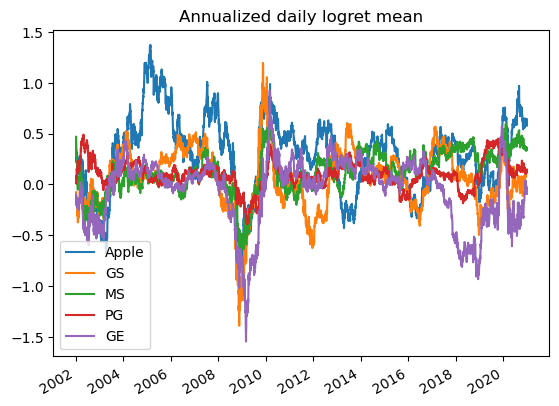

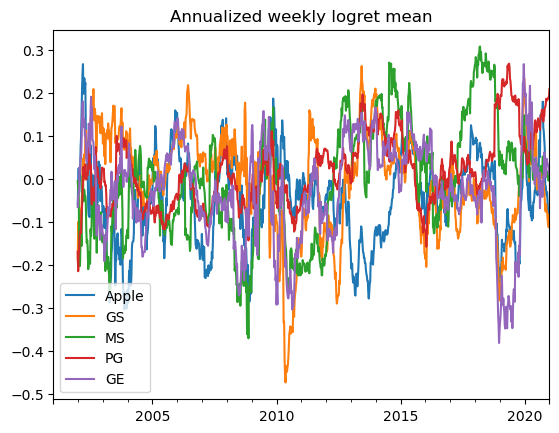

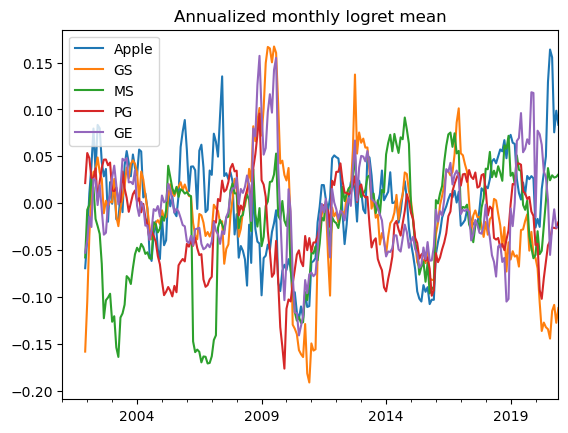

In [14]:
#rolling windows for annualized daily logret mean
apple_dm = apple['logret'].rolling(window = int(1/dt)).mean()/dt
sachs_dm = sachs['logret'].rolling(window = int(1/dt)).mean()/dt
micro_dm = micro['logret'].rolling(window = int(1/dt)).mean()/dt
proct_dm = proct['logret'].rolling(window = int(1/dt)).mean()/dt
gener_dm = gener['logret'].rolling(window = int(1/dt)).mean()/dt

apple_dm.plot(label='Apple')
sachs_dm.plot(label='GS')
micro_dm.plot(label='MS')
proct_dm.plot(label='PG')
gener_dm.plot(label='GE')
plt.legend()
plt.title('Annualized daily logret mean')
plt.show()

#rolling windows for annualized weekly logret mean
apple_wm = apple['logret'].resample('W').last().rolling(window = int(1/dt1)).mean()/dt1
sachs_wm = sachs['logret'].resample('W').last().rolling(window = int(1/dt1)).mean()/dt1
micro_wm = micro['logret'].resample('W').last().rolling(window = int(1/dt1)).mean()/dt1
proct_wm = proct['logret'].resample('W').last().rolling(window = int(1/dt1)).mean()/dt1
gener_wm = gener['logret'].resample('W').last().rolling(window = int(1/dt1)).mean()/dt1

apple_wm.plot(label='Apple')
sachs_wm.plot(label='GS')
micro_wm.plot(label='MS')
proct_wm.plot(label='PG')
gener_wm.plot(label='GE')
plt.legend()
plt.title('Annualized weekly logret mean')
plt.show()

#rolling windows for annualized monthly logret mean
apple_mm = apple['logret'].resample('M').last().rolling(window = int(1/dt2)).mean()/dt2
sachs_mm = sachs['logret'].resample('M').last().rolling(window = int(1/dt2)).mean()/dt2
micro_mm = micro['logret'].resample('M').last().rolling(window = int(1/dt2)).mean()/dt2
proct_mm = proct['logret'].resample('M').last().rolling(window = int(1/dt2)).mean()/dt2
gener_mm = gener['logret'].resample('M').last().rolling(window = int(1/dt2)).mean()/dt2

apple_mm.plot(label='Apple')
sachs_mm.plot(label='GS')
micro_mm.plot(label='MS')
proct_mm.plot(label='PG')
gener_mm.plot(label='GE')
plt.legend()
plt.title('Annualized monthly logret mean')
plt.show()


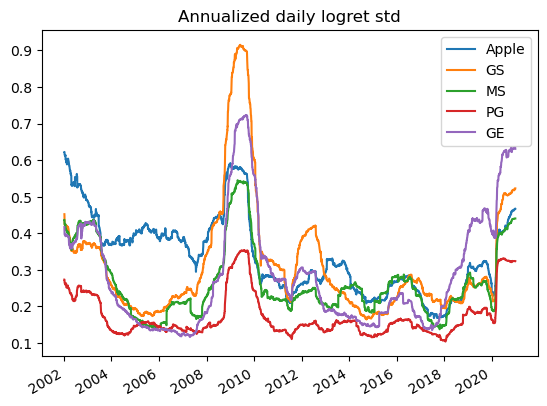

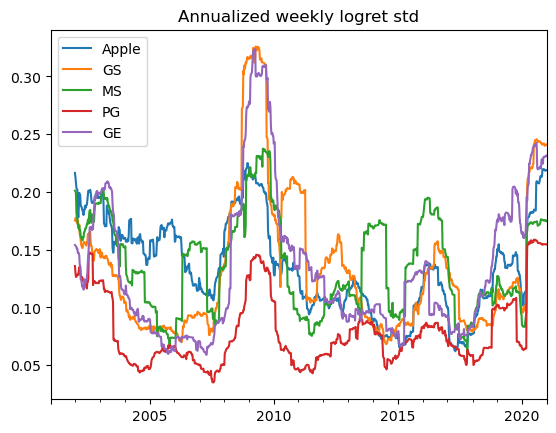

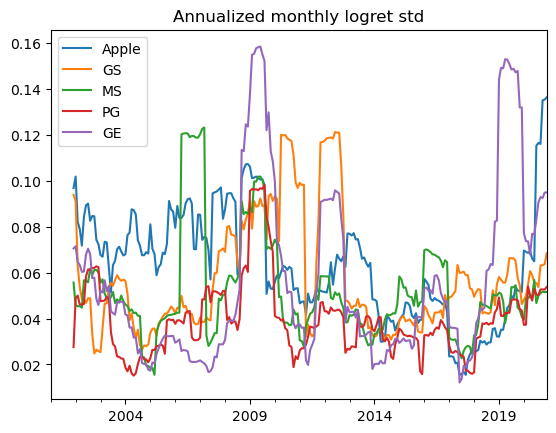

In [15]:
#rolling windows for annualized daily logret std
apple_ds = apple['logret'].rolling(window = int(1/dt)).std()*np.sqrt(1/dt)
sachs_ds = sachs['logret'].rolling(window = int(1/dt)).std()*np.sqrt(1/dt)
micro_ds = micro['logret'].rolling(window = int(1/dt)).std()*np.sqrt(1/dt)
proct_ds = proct['logret'].rolling(window = int(1/dt)).std()*np.sqrt(1/dt)
gener_ds = gener['logret'].rolling(window = int(1/dt)).std()*np.sqrt(1/dt)

apple_ds.plot(label='Apple')
sachs_ds.plot(label='GS')
micro_ds.plot(label='MS')
proct_ds.plot(label='PG')
gener_ds.plot(label='GE')
plt.legend()
plt.title('Annualized daily logret std')
plt.show()

#rolling windows for annualized weekly logret std
apple_ws = apple['logret'].resample('W').last().rolling(window = int(1/dt1)).std()*np.sqrt(1/dt1)
sachs_ws = sachs['logret'].resample('W').last().rolling(window = int(1/dt1)).std()*np.sqrt(1/dt1)
micro_ws = micro['logret'].resample('W').last().rolling(window = int(1/dt1)).std()*np.sqrt(1/dt1)
proct_ws = proct['logret'].resample('W').last().rolling(window = int(1/dt1)).std()*np.sqrt(1/dt1)
gener_ws = gener['logret'].resample('W').last().rolling(window = int(1/dt1)).std()*np.sqrt(1/dt1)

apple_ws.plot(label='Apple')
sachs_ws.plot(label='GS')
micro_ws.plot(label='MS')
proct_ws.plot(label='PG')
gener_ws.plot(label='GE')
plt.legend()
plt.title('Annualized weekly logret std')
plt.show()

#rolling windows for annualized monthly logret std
apple_ms = apple['logret'].resample('M').last().rolling(window = int(1/dt2)).std()*np.sqrt(1/dt2)
sachs_ms = sachs['logret'].resample('M').last().rolling(window = int(1/dt2)).std()*np.sqrt(1/dt2)
micro_ms = micro['logret'].resample('M').last().rolling(window = int(1/dt2)).std()*np.sqrt(1/dt2)
proct_ms = proct['logret'].resample('M').last().rolling(window = int(1/dt2)).std()*np.sqrt(1/dt2)
gener_ms = gener['logret'].resample('M').last().rolling(window = int(1/dt2)).std()*np.sqrt(1/dt2)

apple_ms.plot(label='Apple')
sachs_ms.plot(label='GS')
micro_ms.plot(label='MS')
proct_ms.plot(label='PG')
gener_ms.plot(label='GE')
plt.legend()
plt.title('Annualized monthly logret std')
plt.show()


(f)  If we consider the variation in mean estimates in real world data across the sampling frequencies, we arrive at the same conlcusion as with the simulated data. The estimation of the mean is very noisy. In fact, with real-world data, the variations are even larger. For instance, if we consider PG which seems to be the one that "varies less", the estimation of the mean still varies between -0.5 to 0.5 (approximately) for the daily sampling frequency. The variations can be much wider for the other companies and this doesn't change across the frequencies.  

Secondly, if we consider the variation in the estimate of the standard deviation across the different frequencies, we don't arrive at the same conclusion as before which is that the etimation of the standard deviation improves when we increase the sampling frequency. Indeed, in the real-world data, the std varies a lot across all frequencies. For example, the PG time-serie of standard deviation varies between 0.1 t 0.4 in the daily sampling frequency. The GE time-serie varies between 0.005 to 0.35 in the monthly frequency and between 0.2 to 0.8 for the daily. 

We can explain this difference of pattern between the real-world data and the simulated data by the fact that in the simulated data, we made the assumption that sigma is constant over time which is a bit unrealistic. 

(g) The estimates of the standard deviation increase as we go through the COVID crisis. There is a notable spike  through this window. We also observe the 2008-09 crisis very remarkably with a spike that is even higher than the one of the COVID crisis in the estimate of the standard deviation. For the estimates of the mean, we can notice also a negative spike for the COVID crisis which is also wider for the 2008-09 economic crisis. 